In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
cdata = pd.read_csv("corona_tested_individuals_ver_006.english.csv",low_memory=False)


In [3]:
cdata.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [4]:
cdata.info()
#cdata = cdata.drop(["test_date"],axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   cough                278848 non-null  object
 2   fever                278848 non-null  object
 3   sore_throat          278848 non-null  object
 4   shortness_of_breath  278848 non-null  object
 5   head_ache            278848 non-null  object
 6   corona_result        278848 non-null  object
 7   age_60_and_above     278848 non-null  object
 8   gender               278848 non-null  object
 9   test_indication      278848 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [5]:
cdata.shape

(278848, 10)

In [6]:
pd.Series({col:cdata[col].unique() for col in cdata})


test_date              [2020-04-30, 2020-04-29, 2020-04-28, 2020-04-2...
cough                                                       [0, 1, None]
fever                                                       [0, 1, None]
sore_throat                                                 [0, 1, None]
shortness_of_breath                                         [0, 1, None]
head_ache                                                   [0, 1, None]
corona_result                                [negative, positive, other]
age_60_and_above                                         [None, Yes, No]
gender                                              [female, male, None]
test_indication                  [Other, Abroad, Contact with confirmed]
dtype: object

In [7]:
cdata['corona_result'].value_counts()
cdata = cdata.drop(cdata.index[cdata['corona_result'] == "other"])


In [8]:
pd.Series({col:cdata[col].unique() for col in cdata})


test_date              [2020-04-30, 2020-04-29, 2020-04-28, 2020-04-2...
cough                                                       [0, 1, None]
fever                                                       [0, 1, None]
sore_throat                                                 [0, 1, None]
shortness_of_breath                                         [0, 1, None]
head_ache                                                   [0, 1, None]
corona_result                                       [negative, positive]
age_60_and_above                                         [None, Yes, No]
gender                                              [female, male, None]
test_indication                  [Other, Abroad, Contact with confirmed]
dtype: object

In [9]:
symptoms_g = ["Fever","Cough","Tiredness" ,"loss  taste smell","Shortness  breath" ,"difficulty breathing","Muscle aches","pneumonia",
"Chills","Sore throat","Runny nose","head ache","Chest pain","conjunctivitis","Nausea","Vomiting","Diarrhea","Rash","nasal congestion","bodypain"]
basic_info =["gender","country","age"]
cdata.columns = [i.lower() for i in cdata.columns ]
def filter(a):
    a = [i.lower() for i in a]
    a = [i.replace(" ",",") for i in a]
    a= [i.split(',') for i in a]
    b=[i for i in cdata.columns]
    b = [i.lower() for i in b]
    m=[]
    for y in b:
        for i in a:
            for c in i:
                if (c in y) and c!="":
                    m.append(c)
    final = list(set(y for y in b for i in m if i in y))
    return final

symptoms= filter(symptoms_g)
basic =filter(basic_info)
print(symptoms)
print(basic)
u = basic + symptoms
other_factors = [y for y in cdata.columns  if y not in u  ]
print(other_factors)

['cough', 'head_ache', 'sore_throat', 'shortness_of_breath', 'fever']
['gender', 'age_60_and_above']
['test_date', 'corona_result', 'test_indication']


In [10]:
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
cdata = cdata.apply(label_encoder.fit_transform)
 
cdata.head(10)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,50,0,0,0,0,0,0,1,1,2
1,50,1,0,0,0,0,0,1,1,2
2,50,0,1,0,0,0,0,1,2,2
3,50,1,0,0,0,0,0,1,1,2
4,50,1,0,0,0,0,0,1,2,2
5,50,1,0,0,0,0,0,1,1,2
6,50,1,1,0,0,0,0,1,2,0
7,50,0,0,0,0,0,0,1,1,2
8,50,0,0,0,0,0,0,1,2,2
9,50,0,0,0,0,0,0,1,2,1


<AxesSubplot:>

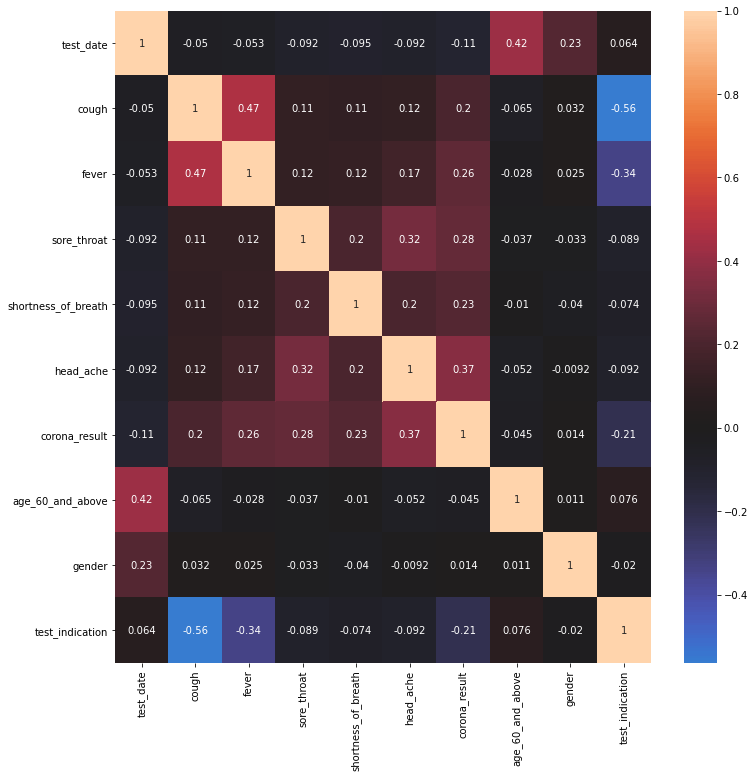

In [11]:
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches
sns.heatmap(cdata.corr(),annot =True,ax=ax,center = 0)

In [12]:
for i in symptoms:
    cdata=cdata.replace({i: 2}, {i: 0}, regex=True)
pd.Series({col:cdata[col].unique() for col in cdata})


test_date              [50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 3...
cough                                                             [0, 1]
fever                                                             [0, 1]
sore_throat                                                       [0, 1]
shortness_of_breath                                               [0, 1]
head_ache                                                         [0, 1]
corona_result                                                     [0, 1]
age_60_and_above                                               [1, 2, 0]
gender                                                         [1, 2, 0]
test_indication                                                [2, 0, 1]
dtype: object

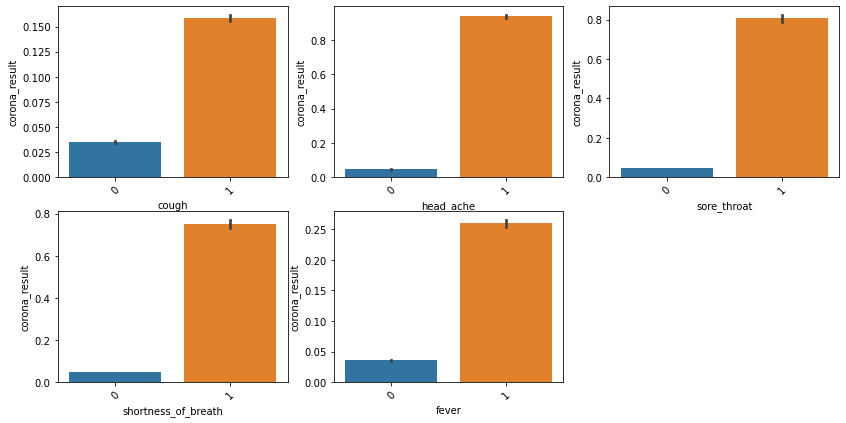

In [13]:
plt.figure(figsize = (14,22))
for j in enumerate(symptoms):
    plt.subplot(6, 3,j[0]+1)
    sns.barplot(x=j[1],y=cdata["corona_result"], data = cdata)
    plt.xticks(rotation = 45)

In [14]:
X = cdata.drop(["corona_result","test_date","gender"],axis=1)
y= cdata["corona_result"]
X.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,test_indication
0,0,0,0,0,0,1,2
1,1,0,0,0,0,1,2
2,0,1,0,0,0,1,2
3,1,0,0,0,0,1,2
4,1,0,0,0,0,1,2


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0. , 0. , 0. , ..., 0. , 0.5, 1. ],
       [1. , 0. , 0. , ..., 0. , 0.5, 1. ],
       [0. , 1. , 0. , ..., 0. , 0.5, 1. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.5, 1. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0.5],
       [0. , 0. , 0. , ..., 0. , 0.5, 1. ]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier()
dt.fit(X_train,y_train.values)
Y_pred_dt = dt.predict(X_test)
   
        
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 96.91 %


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

LR_model= LogisticRegression()

tuned_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,
       
                   }

from sklearn.model_selection import GridSearchCV

LR= GridSearchCV(LR_model, tuned_parameters,cv=10)
LR.fit(X_train,y_train)

y_prob = LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("The accuracy score achieved using logistic regression is: "+str(roc_auc*100)+" %")

The accuracy score achieved using logistic regression is: 84.81000957187047 %


In [19]:
print("The accuracy score achieved using logistic regression is: "+str(round(roc_auc*100,2))+" %")

The accuracy score achieved using logistic regression is: 84.81 %


In [ ]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(4,3))  
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix, annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix logistic regression');

In [ ]:
fig, ax = plt.subplots(figsize=(4,3))  
confusion_matrix=metrics.confusion_matrix(y_test,Y_pred_dt)
sns.heatmap(confusion_matrix, annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix decision tree'); 

In [ ]:
#decision tree 
zc=0
oc=0
for i in range(len(X_test)):
    features = np.array([X_test[i]])
    prediction = dt.predict(features)
    if prediction == 0:
        zc+=1
    else:
        oc+=1
print("infected: ", oc)
print("not infected: ", zc)

In [ ]:
#logistic regression
zc=0
oc=0
for i in range(len(X_test)):
    features = np.array([X_test[i]])
    prediction = LR.predict(features)
    if prediction == 0:
        zc+=1
    else:
        oc+=1
print("infected: ", oc)
print("not infected: ", zc)